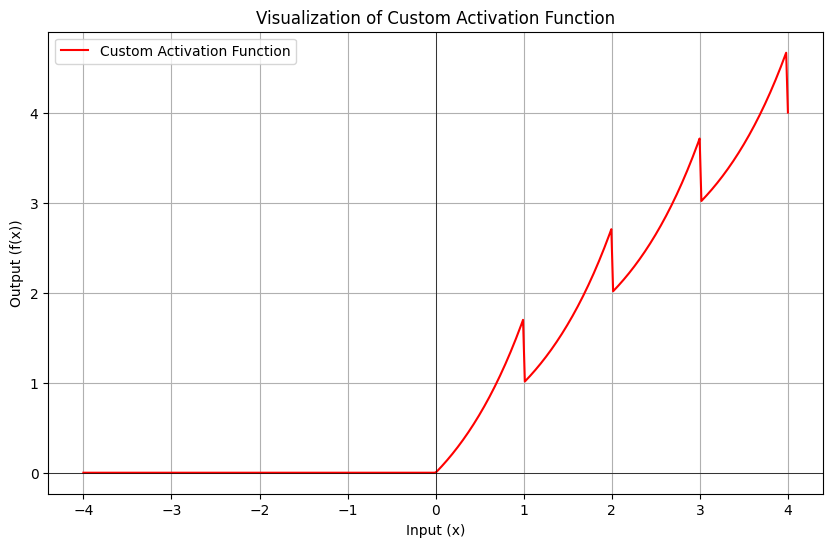

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ReLU training: 
Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.4748 - loss: 1.5143 - val_accuracy: 0.2814 - val_loss: 2.3431
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7196 - loss: 0.7890 - val_accuracy: 0.6906 - val_loss: 0.9056
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7969 - loss: 0.5844 - val_accuracy: 0.7448 - val_loss: 0.7352
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8397 - loss: 0.4548 - val_accuracy: 0.7379 - val_loss: 0.7902
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8780 - loss: 0.3507 - val_accuracy: 0.7807 - val_loss: 0.6914
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9128 - loss: 0.2554 - val_accuracy: 0.7544 - val_loss: 0.7882
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9347 - loss: 0.1854 - val_accuracy: 0.7846 - val_loss: 0.7531
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9505 - loss

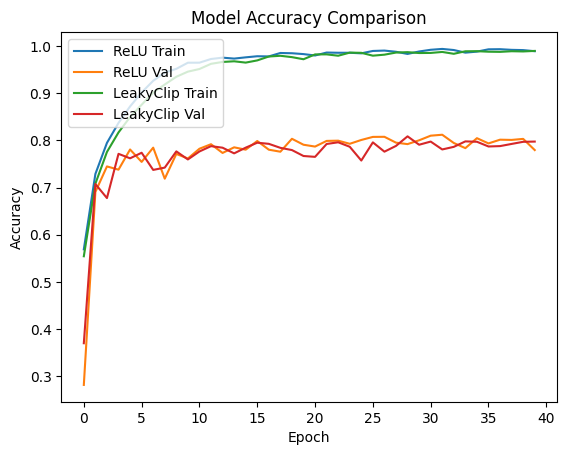

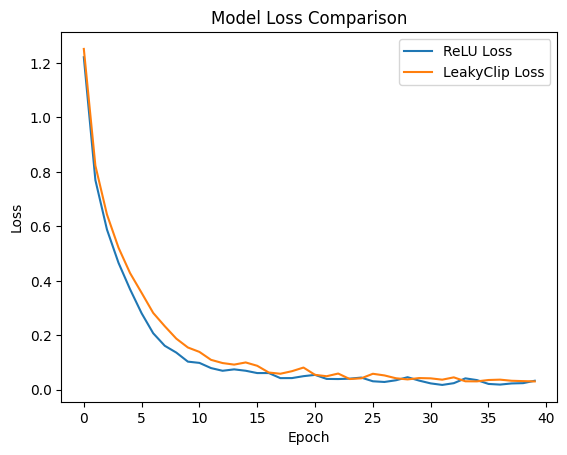

Training Summary:
ReLU: Total Time = 345.02s, Final Accuracy = 0.7795
LeakyClip: Total Time = 365.52s, Final Accuracy = 0.7975
Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


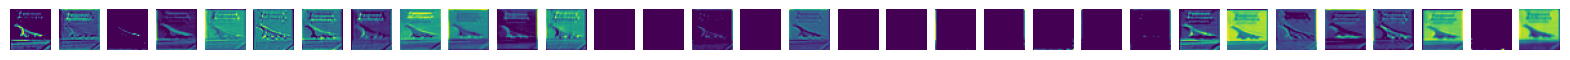

Feature Maps using LeakyClip:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


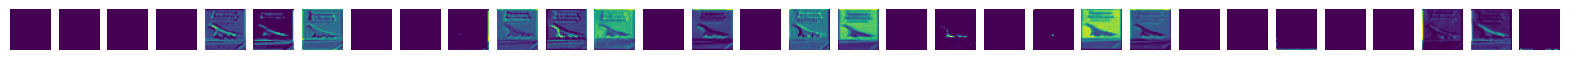

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the LeakyClip Activation Function with TensorFlow operations
def leaky_clip(x):
    # For negative values of x, output is zero
    positive_part = tf.maximum(x, 0)

    # Exponential growth within each interval [n, n+1) for positive x
    fractional_part = tf.exp(tf.math.mod(positive_part, 1.0)) - 1

    # Adding the floor to create the staircase effect
    staircase_part = tf.floor(positive_part)

    # Combine both parts
    return staircase_part + fractional_part

# Register LeakyClip in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'leaky_clip': tf.keras.layers.Activation(leaky_clip)})

# Visualize LeakyClip Activation Function curve
def visualize_activation_curve():
    # Generate input values from -4 to 4
    x_values = np.linspace(-4, 4, 400)
    x_tensor = tf.constant(x_values, dtype=tf.float32)

    # Compute the output using the custom activation function
    y_values = leaky_clip(x_tensor)

    # Evaluate the function to plot
    y_values_evaluated = y_values.numpy()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values_evaluated, label='Custom Activation Function', color='red')
    plt.title("Visualization of Custom Activation Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Output (f(x))")
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.show()

# Visualize the LeakyClip activation function curve
visualize_activation_curve()

# Model Parameters
batch_size = 128
epochs = 40
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
# def create_model(activation_func):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Input(shape=input_shape),
#         tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation=activation_func),
#         tf.keras.layers.Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

import tensorflow as tf

def create_model(activation_func):
    model = tf.keras.models.Sequential([
        # First convolutional block
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation_func, padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Second convolutional block
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Third convolutional block
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=activation_func),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.BatchNormalization(),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



# Create models with ReLU and LeakyClip activation functions
model_relu = create_model('relu')
model_leaky_clip = create_model(leaky_clip)

# Train and time the ReLU model
print("ReLU training: ")
start_time_relu = time.time()
history_relu = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_relu = time.time() - start_time_relu

# Train and time the LeakyClip model
print("LeakyClip training: ")
start_time_leaky_clip = time.time()
history_leaky_clip = model_leaky_clip.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_leaky_clip = time.time() - start_time_leaky_clip

# Plot training and validation accuracy for both models
plt.plot(history_relu.history['accuracy'], label='ReLU Train')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val')
plt.plot(history_leaky_clip.history['accuracy'], label='LeakyClip Train')
plt.plot(history_leaky_clip.history['val_accuracy'], label='LeakyClip Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss for both models
plt.plot(history_relu.history['loss'], label='ReLU Loss')
plt.plot(history_leaky_clip.history['loss'], label='LeakyClip Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print("Training Summary:")
print(f"ReLU: Total Time = {total_time_relu:.2f}s, Final Accuracy = {history_relu.history['val_accuracy'][-1]:.4f}")
print(f"LeakyClip: Total Time = {total_time_leaky_clip:.2f}s, Final Accuracy = {history_leaky_clip.history['val_accuracy'][-1]:.4f}")


# Define a function to plot feature maps for a given layer index
def plot_feature_maps(model, image, layer_idx):
    from tensorflow.keras import Model

    # Create a new model that outputs the feature maps at a specific layer
    feature_map_model = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
    feature_map = feature_map_model.predict(np.expand_dims(image, axis=0))

    # Plot feature maps
    num_filters = feature_map.shape[-1]
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 20))
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()

# Test on a sample image from the test set
sample_image = x_test[3]

# Plot feature maps for a specific layer in each model
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=0)
print("Feature Maps using LeakyClip:")
plot_feature_maps(model_leaky_clip, sample_image, layer_idx=0)


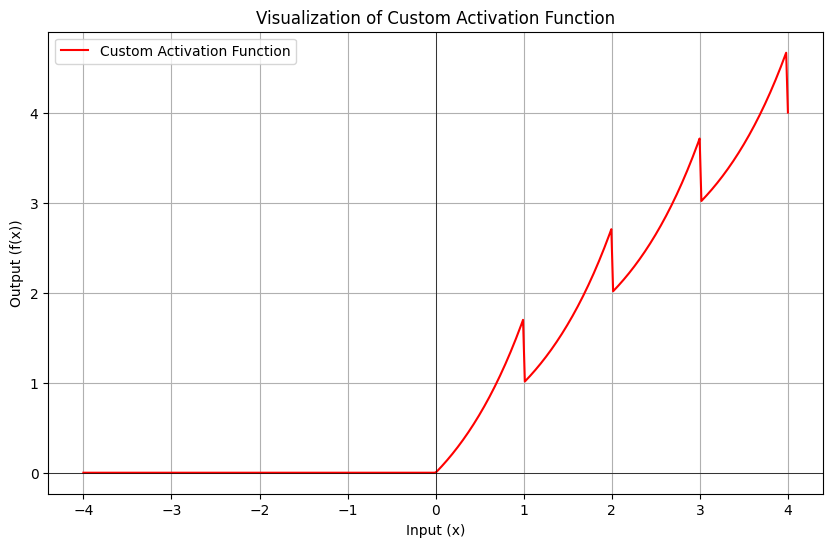

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ReLU training: 
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4646 - loss: 1.5484 - val_accuracy: 0.1390 - val_loss: 4.1826
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7008 - loss: 0.8460 - val_accuracy: 0.3724 - val_loss: 2.0716
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7846 - loss: 0.6167 - val_accuracy: 0.7003 - val_loss: 0.8549
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8404 - loss: 0.4570 - val_accuracy: 0.7177 - val_loss: 0.8609
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8851 - loss: 0.3422 - val_accuracy: 0.7632 - val_loss: 0.7467
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9164 - loss: 0.2519 - val_accuracy: 0.7542 - val_loss: 0.8525
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9325 - loss: 0.1998 - val_accuracy: 0.7585 - val_loss: 0.8445
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9549 

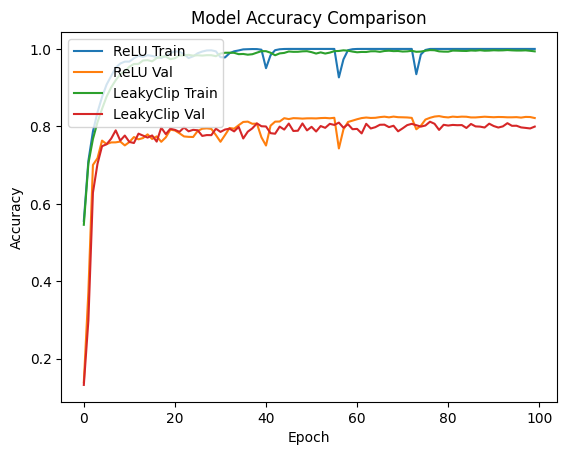

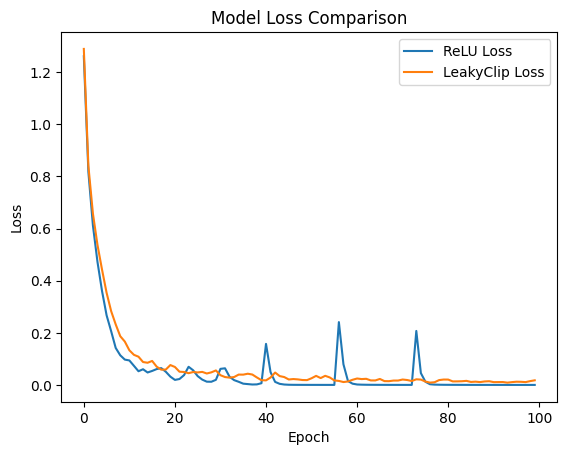

Training Summary:
ReLU: Total Time = 731.94s, Final Accuracy = 0.8215
LeakyClip: Total Time = 780.21s, Final Accuracy = 0.7994
Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


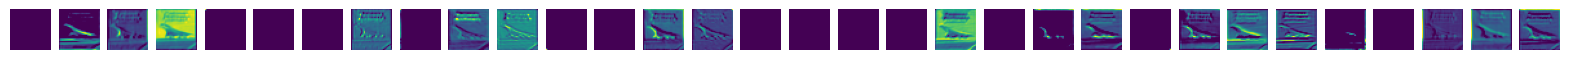

Feature Maps using LeakyClip:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


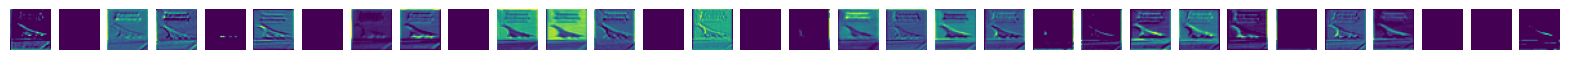

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the LeakyClip Activation Function with TensorFlow operations
def leaky_clip(x):
    # For negative values of x, output is zero
    positive_part = tf.maximum(x, 0)

    # Exponential growth within each interval [n, n+1) for positive x
    fractional_part = tf.exp(tf.math.mod(positive_part, 1.0)) - 1

    # Adding the floor to create the staircase effect
    staircase_part = tf.floor(positive_part)

    # Combine both parts
    return staircase_part + fractional_part

# Register LeakyClip in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'leaky_clip': tf.keras.layers.Activation(leaky_clip)})

# Visualize LeakyClip Activation Function curve
def visualize_activation_curve():
    # Generate input values from -4 to 4
    x_values = np.linspace(-4, 4, 400)
    x_tensor = tf.constant(x_values, dtype=tf.float32)

    # Compute the output using the custom activation function
    y_values = leaky_clip(x_tensor)

    # Evaluate the function to plot
    y_values_evaluated = y_values.numpy()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values_evaluated, label='Custom Activation Function', color='red')
    plt.title("Visualization of Custom Activation Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Output (f(x))")
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.show()

# Visualize the LeakyClip activation function curve
visualize_activation_curve()

# Model Parameters
batch_size = 256
epochs = 100
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
# def create_model(activation_func):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Input(shape=input_shape),
#         tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation=activation_func),
#         tf.keras.layers.Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

import tensorflow as tf

def create_model(activation_func):
    model = tf.keras.models.Sequential([
        # First convolutional block
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation_func, padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Second convolutional block
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Third convolutional block
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=activation_func),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.BatchNormalization(),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



# Create models with ReLU and LeakyClip activation functions
model_relu = create_model('relu')
model_leaky_clip = create_model(leaky_clip)

# Train and time the ReLU model
print("ReLU training: ")
start_time_relu = time.time()
history_relu = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_relu = time.time() - start_time_relu

# Train and time the LeakyClip model
print("LeakyClip training: ")
start_time_leaky_clip = time.time()
history_leaky_clip = model_leaky_clip.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_leaky_clip = time.time() - start_time_leaky_clip

# Plot training and validation accuracy for both models
plt.plot(history_relu.history['accuracy'], label='ReLU Train')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val')
plt.plot(history_leaky_clip.history['accuracy'], label='LeakyClip Train')
plt.plot(history_leaky_clip.history['val_accuracy'], label='LeakyClip Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss for both models
plt.plot(history_relu.history['loss'], label='ReLU Loss')
plt.plot(history_leaky_clip.history['loss'], label='LeakyClip Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print("Training Summary:")
print(f"ReLU: Total Time = {total_time_relu:.2f}s, Final Accuracy = {history_relu.history['val_accuracy'][-1]:.4f}")
print(f"LeakyClip: Total Time = {total_time_leaky_clip:.2f}s, Final Accuracy = {history_leaky_clip.history['val_accuracy'][-1]:.4f}")


# Define a function to plot feature maps for a given layer index
def plot_feature_maps(model, image, layer_idx):
    from tensorflow.keras import Model

    # Create a new model that outputs the feature maps at a specific layer
    feature_map_model = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
    feature_map = feature_map_model.predict(np.expand_dims(image, axis=0))

    # Plot feature maps
    num_filters = feature_map.shape[-1]
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 20))
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()

# Test on a sample image from the test set
sample_image = x_test[3]

# Plot feature maps for a specific layer in each model
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=0)
print("Feature Maps using LeakyClip:")
plot_feature_maps(model_leaky_clip, sample_image, layer_idx=0)


**ResNET**

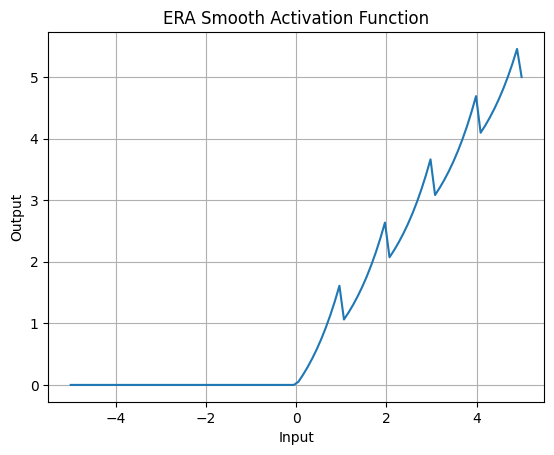


Training with ERA Smooth activation function...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.3602 - loss: 1.7430 - val_accuracy: 0.4475 - val_loss: 1.5465
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 51ms/step - accuracy: 0.6080 - loss: 1.0937 - val_accuracy: 0.2687 - val_loss: 3.4484
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6692 - loss: 0.9380 - val_accuracy: 0.5203 - val_loss: 1.4454
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.6998 - loss: 0.8388 - val_accuracy: 0.6083 - val_loss: 1.1338
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7352 - loss: 0.7545 - val_accuracy: 0.5558 - val_loss: 1.6007
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7557 - loss: 0.6986 - val_accuracy: 0.7025 - val_loss: 0.8752
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7768 - loss: 0.6443 - val_accuracy: 0.6279 - val_loss: 1.2505
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
ERA Smooth Confusion Matrix:
 [[803   1  94   6   9   1  59  13  14   0]
 [ 94 764  12   8   0   3 103   5   5   6]
 [ 48   0 599   8  20  60 228  37   0   0]
 [ 19   0  72 280  24 183 383  39   0   0]
 [ 18   0 115  12 480  24 302  48   1   0]
 [  3   1  48  34  21 712 147  34   0   0]
 [  4   0  16   3   2   5 970   0   0   0]
 [ 15   0  60   5  23  59  74 764   0   0]
 [155  12  39  25   4  13  95   8 649   0]
 [185 113  11  37   7  30 113  48   8 448]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.69      1000
           1       0.86      0.76      0.81      1000
           2       0.56      0.60      0.58      1000
           3       0.67      0.28      0.39      1000
           4       0.81      0.48      0.60      1000
           5       0.65      0.71      0.68      1000
           6       0.39      0.97      0.56      1000
           7       0.77      0.76      0.77      1000
          

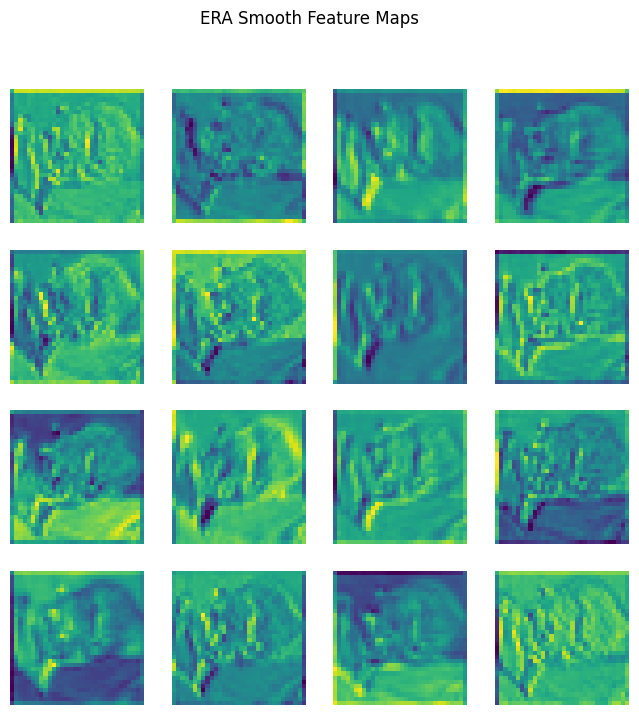


Training with ReLU activation function...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 61ms/step - accuracy: 0.4395 - loss: 1.5238 - val_accuracy: 0.3886 - val_loss: 2.3114
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6393 - loss: 1.0144 - val_accuracy: 0.1590 - val_loss: 8.9221
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6872 - loss: 0.8749 - val_accuracy: 0.5862 - val_loss: 1.2913
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.7327 - loss: 0.7668 - val_accuracy: 0.4625 - val_loss: 2.4202
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7621 - loss: 0.6843 - val_accuracy: 0.6405 - val_loss: 1.1004
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.7863 - loss: 0.6193 - val_accuracy: 0.6686 - val_loss: 0.9151
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8058 - loss: 0.5602 - val_accuracy: 0.6520 - val_loss: 1.0553
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48m

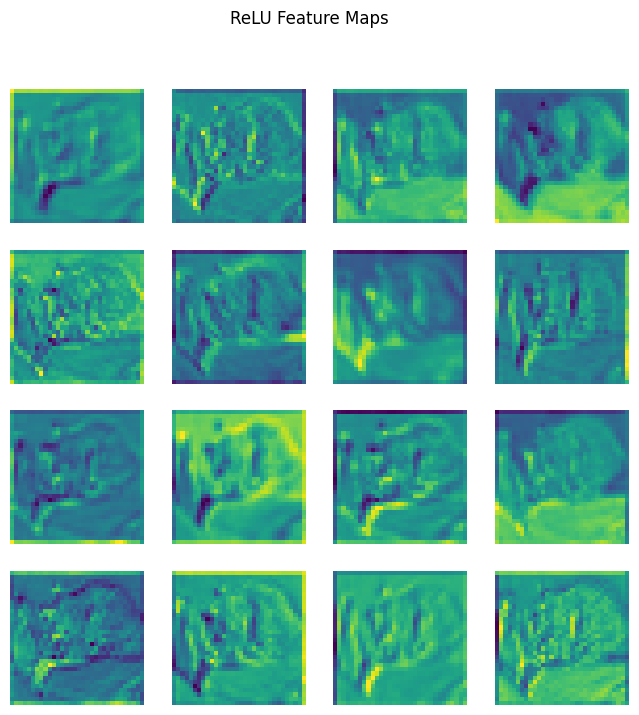

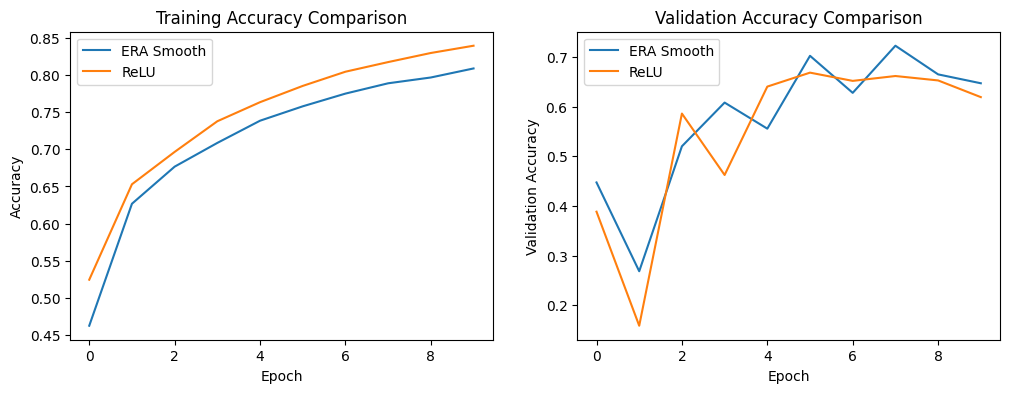

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix, classification_report

# Define the Exponential Range Activation (ERA) function with smooth transitions
class EraSmoothActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EraSmoothActivation, self).__init__(**kwargs)

    def call(self, inputs):
        # For negative values of inputs, output is zero
        positive_part = tf.maximum(inputs, 0)

        # Exponential growth within each interval [n, n+1) for positive inputs
        fractional_part = tf.exp(tf.math.mod(positive_part, 1.0)) - 1

        # Adding the floor to create the staircase effect
        staircase_part = tf.floor(positive_part)

        # Combine both parts
        return staircase_part + fractional_part

# Visualization of the ERA Smooth activation function
# Visualization of the ERA Smooth activation function
def plot_era_smooth():
    x = np.linspace(-5, 5, 100)

    # Applying the EraSmoothActivation function
    y = np.vectorize(lambda x_val: EraSmoothActivation()(tf.convert_to_tensor(x_val, dtype=tf.float32)).numpy())(x)

    # Plot the ERA Smooth activation function
    plt.plot(x, y)
    plt.title("ERA Smooth Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid()
    plt.show()

plot_era_smooth()

# Define ResNet-20 model
def resnet_block(x, filters, activation):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Check if channel dimensions match, else project the shortcut
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = activation(x)
    return x

def create_resnet_20(input_shape, num_classes, activation):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = activation(x)

    for _ in range(3):
        x = resnet_block(x, 16, activation)
    for _ in range(3):
        x = resnet_block(x, 32, activation)
    for _ in range(3):
        x = resnet_block(x, 64, activation)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

# Load CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train / 255.0, y_train), (x_test / 255.0, y_test)

# Train and evaluate function
def train_and_evaluate(activation_layer, activation_name):
    (x_train, y_train), (x_test, y_test) = load_data()
    model = create_resnet_20((32, 32, 3), 10, activation=activation_layer())
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Track training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    total_time = time.time() - start_time

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"{activation_name} Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Training Time for {activation_name}: {total_time:.2f} seconds")

    # Confusion matrix
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    print(f"{activation_name} Confusion Matrix:\n", conf_matrix)
    print(classification_report(y_true, y_pred_classes))

    # Plot feature maps
    feature_model = models.Model(inputs=model.inputs, outputs=model.layers[2].output)
    feature_map = feature_model.predict(np.expand_dims(x_test[0], axis=0))
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.suptitle(f"{activation_name} Feature Maps")
    plt.show()

    return history, total_time

# Train and compare models with ERA Smooth and ReLU activation functions
print("\nTraining with ERA Smooth activation function...")
history_era_smooth, time_era_smooth = train_and_evaluate(EraSmoothActivation, "ERA Smooth")

print("\nTraining with ReLU activation function...")
history_relu, time_relu = train_and_evaluate(lambda: tf.keras.layers.Activation('relu'), "ReLU")

# Plot training history
def plot_history(history_era, history_relu):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_era.history['accuracy'], label='ERA Smooth')
    plt.plot(history_relu.history['accuracy'], label='ReLU')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Accuracy Comparison')

    plt.subplot(1, 2, 2)
    plt.plot(history_era.history['val_accuracy'], label='ERA Smooth')
    plt.plot(history_relu.history['val_accuracy'], label='ReLU')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Validation Accuracy Comparison')
    plt.show()

plot_history(history_era_smooth, history_relu)


# Starecase

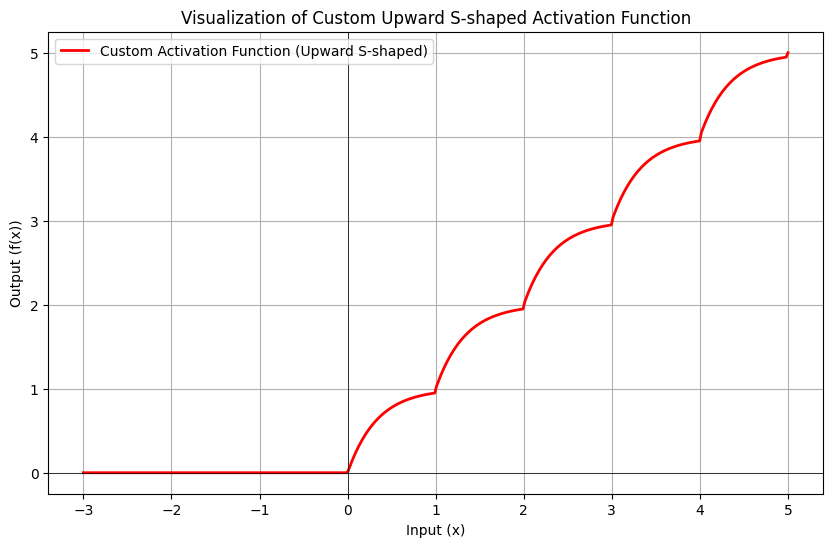

C:\Users\Arafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ReLU training: 
Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 159s 385ms/step - accuracy: 0.4657 - loss: 1.5283 - val_accuracy: 0.2696 - val_loss: 2.7811
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.7150 - loss: 0.8084 - val_accuracy: 0.7047 - val_loss: 0.8724
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 166s 425ms/step - accuracy: 0.7938 - loss: 0.5942 - val_accuracy: 0.7414 - val_loss: 0.8007
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 170s 436ms/step - accuracy: 0.8439 - loss: 0.4469 - val_accuracy: 0.7576 - val_loss: 0.7355
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 172s 440ms/step - accuracy: 0.8820 - loss: 0.3446 - val_accuracy: 0.7643 - val_loss: 0.7399
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 175s 448ms/step - accuracy: 0.9133 - loss: 0.2555 - val_accuracy: 0.7613 - val_loss: 0.8232
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 177s 454ms/step - accuracy: 0.9364 - loss: 0.1879 - val_accuracy: 0.7878 - val_loss: 0.7496
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 178s 456ms/step - ac

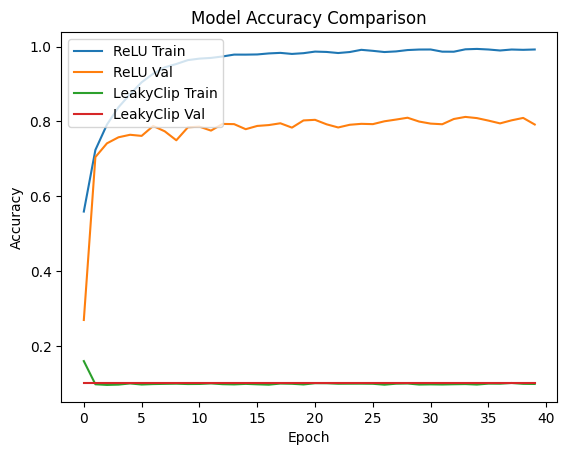

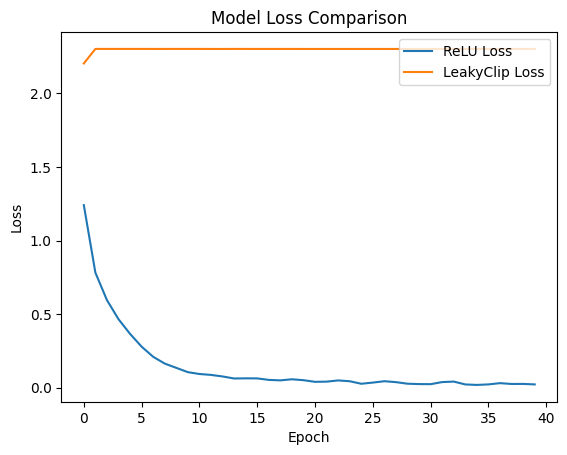

Training Summary:
ReLU: Total Time = 7611.61s, Final Accuracy = 0.7917
LeakyClip: Total Time = 21711.75s, Final Accuracy = 0.1000
Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


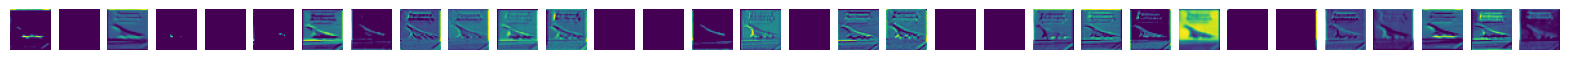

Feature Maps using LeakyClip:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


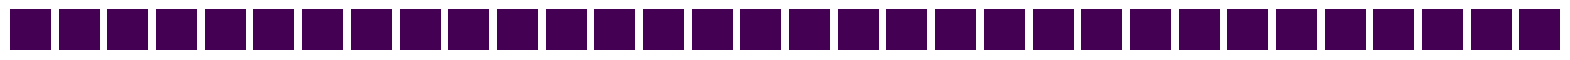

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the LeakyClip Activation Function with TensorFlow operations
def leaky_clip(x, k=3):
    # Initialize output for x <= 0
    output = tf.where(x <= 0, tf.zeros_like(x), tf.zeros_like(x))
    
    # Apply S-shaped transitions for positive x with upward growth within each integer interval
    for n in range(0, 6):  # Visualize up to x = 5
        interval_start = tf.cast(n, tf.float32)
        
        # Define upward S-shaped curve within each interval using an exponential function
        upward_transition = interval_start + (1 - tf.exp(-k * (x - interval_start)))
        
        # Accumulate results based on the interval
        output = tf.where((x >= interval_start) & (x < interval_start + 1), upward_transition, output)
    
    return output

# Generate input values from -3 to 5
x_values = np.linspace(-3, 5, 400)
x_tensor = tf.constant(x_values, dtype=tf.float32)

# Compute the output using the custom activation function
y_values = leaky_clip(x_tensor)

# Evaluate the function to plot
y_values_evaluated = y_values.numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_evaluated, label='Custom Activation Function (Upward S-shaped)', color='red', linewidth=2)
plt.title("Visualization of Custom Upward S-shaped Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


# Register LeakyClip in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'leaky_clip': tf.keras.layers.Activation(leaky_clip)})


# Model Parameters
batch_size = 128
epochs = 40
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
# def create_model(activation_func):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Input(shape=input_shape),
#         tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation=activation_func),
#         tf.keras.layers.Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

import tensorflow as tf

def create_model(activation_func):
    model = tf.keras.models.Sequential([
        # First convolutional block
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation_func, padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Second convolutional block
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Third convolutional block
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation_func, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=activation_func),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.BatchNormalization(),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



# Create models with ReLU and LeakyClip activation functions
model_relu = create_model('relu')
model_leaky_clip = create_model(leaky_clip)

# Train and time the ReLU model
print("ReLU training: ")
start_time_relu = time.time()
history_relu = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_relu = time.time() - start_time_relu

# Train and time the LeakyClip model
print("LeakyClip training: ")
start_time_leaky_clip = time.time()
history_leaky_clip = model_leaky_clip.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_leaky_clip = time.time() - start_time_leaky_clip

# Plot training and validation accuracy for both models
plt.plot(history_relu.history['accuracy'], label='ReLU Train')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val')
plt.plot(history_leaky_clip.history['accuracy'], label='LeakyClip Train')
plt.plot(history_leaky_clip.history['val_accuracy'], label='LeakyClip Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss for both models
plt.plot(history_relu.history['loss'], label='ReLU Loss')
plt.plot(history_leaky_clip.history['loss'], label='LeakyClip Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print("Training Summary:")
print(f"ReLU: Total Time = {total_time_relu:.2f}s, Final Accuracy = {history_relu.history['val_accuracy'][-1]:.4f}")
print(f"LeakyClip: Total Time = {total_time_leaky_clip:.2f}s, Final Accuracy = {history_leaky_clip.history['val_accuracy'][-1]:.4f}")


# Define a function to plot feature maps for a given layer index
def plot_feature_maps(model, image, layer_idx):
    from tensorflow.keras import Model

    # Create a new model that outputs the feature maps at a specific layer
    feature_map_model = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
    feature_map = feature_map_model.predict(np.expand_dims(image, axis=0))

    # Plot feature maps
    num_filters = feature_map.shape[-1]
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 20))
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()

# Test on a sample image from the test set
sample_image = x_test[3]

# Plot feature maps for a specific layer in each model
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=0)
print("Feature Maps using LeakyClip:")
plot_feature_maps(model_leaky_clip, sample_image, layer_idx=0)
